In [ ]:
import sys
import os
sys.path.append("./../")


import tensorflow as tf
from estimation_study import *
from estimation_assessment.scores import *
from estimation_assessment.visualization import *


tensorflow version: 2.5.0
[LogicalDevice(name='/device:CPU:0', device_type='CPU')] []


## <center> Investigation reports </center>

### Introduction

This study investigates the vertical ground reaction force (GRF) and knee flexion moment (KFM) estimations based on deep neural network in human drop landing.


### Experimental design


Fifteen subjects (all male) To collect enough data for training the neural network, fifteen subjects dropped from a box landing on the ground equipped with force plate in a laboratory where has optical motion capture system (VICON), force plate, and wearable IMUs. Each subject perform two types of drop landing behaviors: double-legs drop landing and single-leg drop landing. The double-legs and single-leg drop landing repeated 30 and 15 times, respectively. 


### Data processing
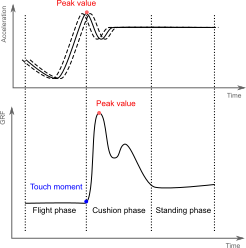


### Deep learning model 






# <center > Experiment results </center>

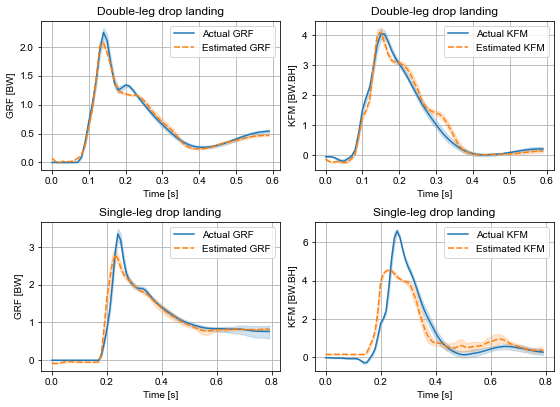

/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/data_visulization/2022-05-20/23_33_22_statistic.svg


In [2]:
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/testing_result_folders.txt"
combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/metrics.csv"
display_configs = { 'test_ids': ['test_153345','test_091548','test_122609','test_104906'],
                    'ylabel': ['GRF [BW]', 'KFM [BW.BH]','GRF [BW]', 'KFM [BW.BH]'],
                    'subplot_titles': [
                                        'Double-leg drop landing',
                                        'Double-leg drop landing',
                                        'Single-leg drop landing',
                                        'Single-leg drop landing'
                                      ],
                    'legends': [
                            ['Actual GRF', 'Estimated GRF'],
                            ['Actual KFM', 'Estimated KFM'],
                            ['Actual GRF', 'Estimated GRF'],
                            ['Actual KFM', 'Estimated KFM']
                              ]
                    }
fig_path, b = plot_statistic_actual_estimation_curves(combination_investigation_results,
                                        verbose=1,
                                        display_configs=display_configs)
print(fig_path)

**Figure 1. Ensemble curves for GRF and KFM in double-leg and single-leg drop landing. The actual and predicted GRFs and KFMs are shown as the solid and dashed line.**

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


DROP R2 cases below :0.6
All LSTM units are used


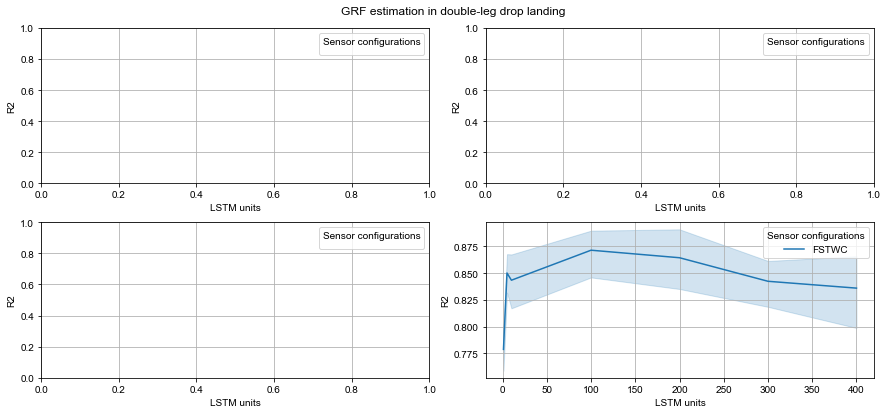

/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/2022-05-24/20_19/data_visulization/2022-05-24/21_17_28_GRF_estimation.svg


In [16]:
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-27/143322/testing_result_folders.txt"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/matpool_trained_data_1/testing_result_folders.txt"
#pd_assessment = get_testing_metrics(combination_investigation_results)

combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-30/all_sensor_list/all_sensor_configs_metrics.csv"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/testing_result_folders.txt"
combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/metrics.csv"

combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/complete_config/sorted_testing_result_folders.txt"
#combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-05-09/224455/off_on_synchronizationtesting_result_folders.txt"

#r2_metrics = get_investigation_metrics(combination_investigation_results)

#combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-27/143322/testing_result_folders.txt"
#pd_assessment = get_testing_metrics(combination_investigation_results)
#combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-27/143322/metrics.csv"
#combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-05-09/094720/off_on_synchronizationtesting_result_folders.txt"
#combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-30/all_sensor_list/all_sensor_configs_metrics.csv"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-05-24/205937/GRFtesting_result_folders.txt"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/2022-05-24/20_19/metrics.csv"
#combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/all_sensors_lstm_units_GRF/metrics.csv"
fig_path, metrics = plot_sensorconfig_modelsize_investigation_results(combination_investigation_results,estimated_variable='GRF', syn_features_label=False,
                                                  title=' estimation in double-leg drop landing',drop_value=0.6)
print(fig_path)

In [3]:
metrics.head()

,Unnamed: 0,metrics,fields,scores,Sensor configurations,LSTM units,Test ID,average scores,IMU number
3118,0,r2,L_GRF_Z,0.600,F,35,test_091238,0.789,1
1912,0,r2,L_GRF_Z,0.601,F,35,test_084803,0.789,1
2943,0,r2,L_GRF_Z,0.602,F,35,test_085659,0.789,1
7096,0,r2,L_GRF_Z,0.604,F,35,test_083816,0.789,1
7189,0,r2,L_GRF_Z,0.604,F,35,test_084541,0.789,1


**Figure 2. R2 of Ground reaction force (GRF, $F_z$) estimation with different LSTM units and sensor configurations in double-leg drop landing.** 
### Results
<div> <font color='Blue'>
1. There are no significant trend for more LSTM units showing greater estimation accuracy of GRF. 
</font>    </div>
<div> <font color='Blue'>
2. Sensor configurations has larger impact on GRF estimation accuracy than LSTM units.
</font>    </div>

DROP R2 cases below :0.6
All LSTM units are used


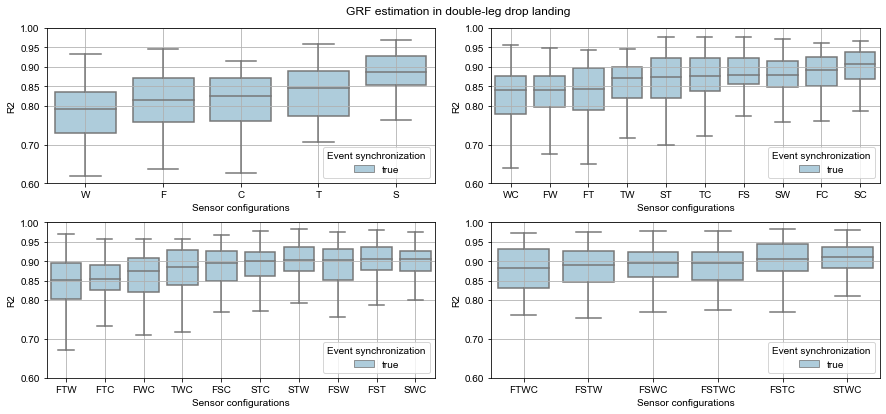

/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train_bk/08_30/data_visulization/2022-05-25/10_34_08_ estimation in double-leg drop landing.svg


In [20]:
combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-30/all_sensor_list/all_sensor_configs_metrics.csv"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/testing_result_folders.txt"
combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/metrics.csv"
#pd_assessment = get_testing_metrics(combination_investigation_results)

combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-30/all_sensor_list/all_sensor_configs_metrics.csv"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/testing_result_folders.txt"

combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/metrics.csv"
#pd_assessment = get_testing_metrics(combination_investigation_results)
#combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-30/all_sensor_list/all_sensor_configs_metrics.csv"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/complete_config/sorted_testing_result_folders.txt"
#combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/complete_config/metrics.csv"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/metrics.csv"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train_bk/08_30/testing_result_folders.txt"
fig_path, r2 = plot_sensor_config_investigation_results(combination_investigation_results,
                                                    landing_manner='double_legs', 
                                                    estimated_variable='GRF',
                                                    syn_features_label='both',
                                                    title=' estimation in double-leg drop landing',
                                                    LSTM_unit=35, drop_value=0.6)
print(fig_path)

**Figure 3. R2 of the vertical ground reaction force (GRF, $Fz$) estimation with different IMU configurations in double-leg drop landing. Event-based synchronization between features and labels was used to process the datasets for improving estimation accuracy. To comparatively show the effectiveness of the event-based synchronization, the estimation without the event-based synchronization was also provided** *The IMU configurations are namely by the IMU placement on subjects' segments. It includes five segments: F (left foot), S (left shank), T (left thigh), W (waist), and C (chest). There are 31 ways to to configure the five IMUs' placement in total. Here, the IMU configuration methods are summarized as four categories according to the employed IMU number: single IMU, two IMUs, three IMUs, and four-five IMUs.*

#### Results:
1. The event-based synchronization technique can greatly improve the GRF estimation accuracy under all sensor configurations in the double-leg drop landing. 

2. With single IMU configuration, IMU placed on the trunk with event-based synchronization allow the algorithm to perform significantly greater GRF estimation accuracy. 

3. The maximum R2 values of the estimation in the five classes are with the IMU configurations: T (trunk), TC (trunk and chest), FTC (foot, trunk, and chest), FSWC (foot, shank, waist, and chest), and FSTWC (foot, shank, trunk, waist, and chest).

4. Generally, the more IMUs employed, the greater estimation accuracy.

5. The IMU placement has significant influences on the estimation accuracy.

6. Some four IMU configurations (FSWC, FSTC, and FTWC) have similar estimation accuracy.


3. IMU configuration with good estimation accuracy in each categories.

| IMU configuration categories | IMU configurations with good accuracy ( 0.9 < median R2 < 0.95) | IMU configurations with excellent accuracy (median R2 > 0.95) |
|---|---|--|
| Single IMU | S, T |
| Two IMUs | FS, SC, FT, TW, FC, TC |
| Three IMUs | FST, TWC, STW, SWC, FTW, FWC, FSC, FSW| FTC |
| Four-five IMUs| FSTW, FSTC, FTWC, FSTWC| 
    

DROP R2 cases below :0.6
All LSTM units are used


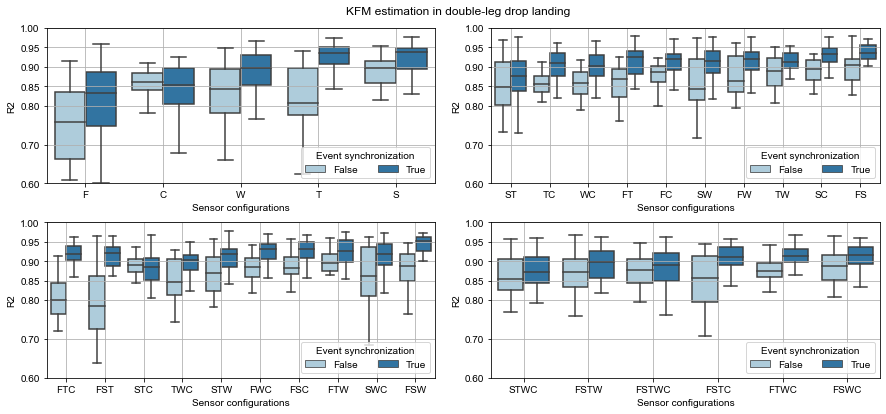

/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/data_visulization/2022-05-21/00_25_39_ estimation in double-leg drop landing.svg


In [10]:
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/metrics.csv"
fig_path, b= plot_sensor_config_investigation_results(combination_investigation_results, landing_manner='double_legs', 
                                                    estimated_variable='KFM',
                                                    syn_features_label='both',
                                                    title=' estimation in double-leg drop landing',
                                                   LSTM_unit=35,
                                                   drop_value=0.6)
print(fig_path)

**Figure 4. R2 of the Knee flexion moment (KFM) estimation with different IMU configurations in double-leg drop landing. To comparatively show the effectiveness of the event-based synchronization, the estimation without the event-based synchronization was also provided** 
*The IMU configurations are namely by the IMU placement on subjects' segments. It includes five segments: F (left foot), S (left shank), T (left thigh), W (waist), and C (chest). There are 31 ways to to configure the five IMUs' placement in total. Here, the IMU configuration methods are summarized as four categories according to the employed IMU number: single IMU, two IMUs, three IMUs, and four-five IMUs.*


    
#### Results:

1. The event-based synchronization technique can greatly improve the KFM estimation accuracy under most sensor configurations in the double-leg drop landing. 

2. The IMU placement has significant influences on the KFM estimation accuracy.

3. IMU configuration with good estimation accuracy in each categories.

| IMU configuration categories | IMU configurations with good accuracy (0.9 < median R2 < 0.95) | IMU configurations with excellent accuracy (median R2 > 0.95) |
|---|---|---|
| Single IMU | T, S | |
| Two IMUs | TC, FT, FC, SW, TW, FW, SC, FS | |
| Three IMUs | FTC, FST, TWC, STW, SWC, FTW, FWC, FSC | FSW |
| Four-five IMUs| FSTW, FSTC, FTWC, FSTWC| | 

DROP R2 cases below :0.6
All LSTM units are used


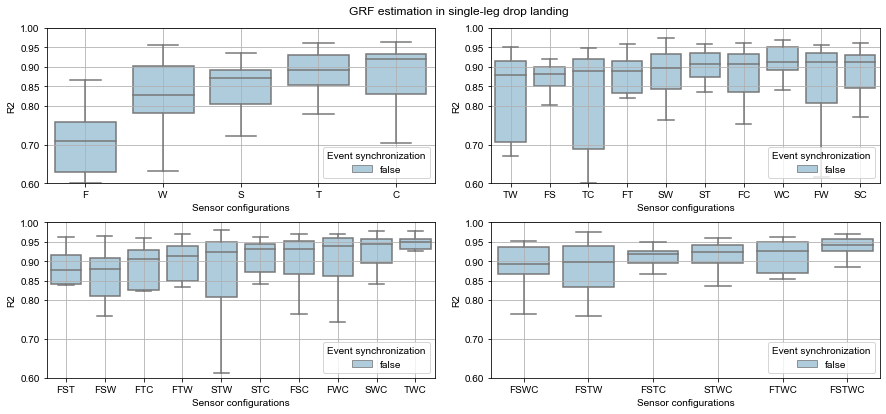

/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/10_03/data_visulization/2022-05-21/00_25_38_ estimation in single-leg drop landing.svg


In [9]:
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/10_03/testing_result_folders.txt"
#combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/10_03/metrics.csv"
fig_path, r2= plot_sensor_config_investigation_results(combination_investigation_results, 
                                                    landing_manner='single_leg_R',
                                                    estimated_variable = 'GRF',
                                                    syn_features_label='both',
                                                    title=' estimation in single-leg drop landing',
                                                    LSTM_unit=35,
                                                    drop_value=0.6)
print(fig_path)

**Figure 5. R2 of the vertical ground reaction force (GRF) estimation with different IMU configurations in single-leg drop landing.**
    
#### Results:

1. IMU configuration with good estimation accuracy

| IMU configuration categories | IMU configurations with good accuracy (0.9 < median R2 < 0.95) | IMU configurations with excellent accuracy (median R2 > 0.95) |
|---|---|---|
| Single IMU | C | |
| Two IMUs | ST, FC, WC, FW, SC | |
| Three IMUs | FTC, FTW, STW, STC, FSC, FWC, SWC | TWC |
| Four-five IMUs| FSTC, STWC, FTWC, FSTWC| 

2. With more IMUs, the estimation has higher and stable accuracy in statistically.

3. The IMU placement has significant influences on the GRF estimation accuracy of single-keg drop landing.
    

DROP R2 cases below :0.6
All LSTM units are used


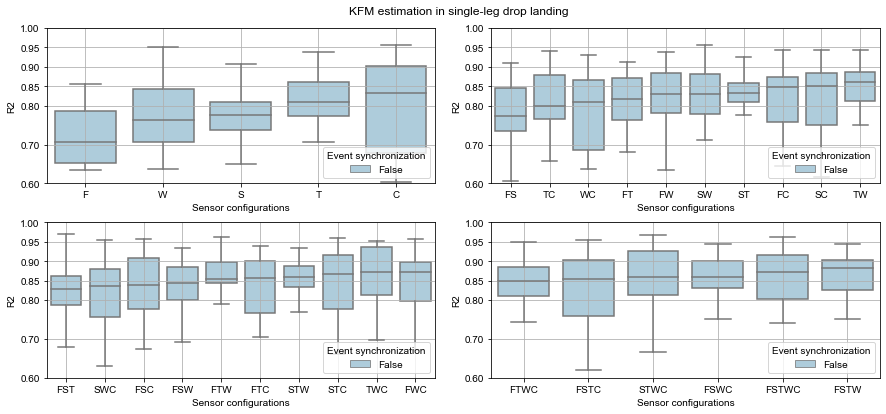

/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/10_03/data_visulization/2022-05-21/00_35_56_ estimation in single-leg drop landing.svg


In [11]:
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/10_03/testing_result_folders.txt"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/10_03/metrics.csv"
fig_path, r2 = plot_sensor_config_investigation_results(combination_investigation_results, 
                                                    landing_manner='single_leg_R',
                                                    estimated_variable = 'KFM',
                                                    syn_features_label='both',
                                                    title=' estimation in single-leg drop landing',
                                                    LSTM_unit=35,
                                                    drop_value=0.6)
print(fig_path)

**Figure 6. R2 of the knee flexion moment (KFM) estimation with different IMU configurations in single-leg drop landing.**

    
#### Results:

1. IMU configuration with good estimation accuracy

| IMU configuration categories | IMU configurations with **moderate** accuracy (0.85 < median R2 < 0.9) |
|---|---|
| Single IMU | F | |
| Two IMUs | SC |
| Three IMUs | FWC |
| Four-five IMUs| FSTC | 

2. Three, four, and five IMU configurations have similar estimation accuracy.


In [12]:
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/testing_result_folders.txt"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/latest_train/metrics.csv"
metrics = get_investigation_metrics(combination_investigation_results,metric_fields=['r2','r_rmse','rmse'])
metrics = metrics.drop(metrics[(metrics['metrics']=='r2') & (metrics['scores']<0.6)].index)
group_metrics = metrics.groupby(['estimated_variables','landing_manners','syn_features_labels', 'metrics'])
statistic_metrics = group_metrics.describe().loc[:,'scores']
statistic_metrics.loc[:,('mean','std')].T.round(3)

estimated_variables         GRF                                     \
landing_manners     double_legs                                      
syn_features_labels       False                True                  
metrics                      r2 r_rmse   rmse     r2 r_rmse   rmse   
mean                      0.803  0.104  0.237  0.903  0.072  0.165   
std                       0.092  0.027  0.086  0.058  0.025  0.051   

estimated_variables                                    KFM                \
landing_manners     single_leg_R               double_legs                 
syn_features_labels        False                     False                 
metrics                       r2 r_rmse   rmse          r2 r_rmse   rmse   
mean                       0.859  0.108  0.391       0.860  0.099  0.435   
std                        0.104  0.049  0.194       0.062  0.027  0.112   

estimated_variables                                                  
landing_manners                          single_leg_R                
syn_features_labels  True                       False                
metrics                 r2 r_rmse   rmse           r2 r_rmse   rmse  
mean                 0.899  0.092  0.397        0.828  0.109  0.629  
std                  0.061  0.035  0.122        0.079  0.032  0.225

DROP R2 cases below :0.6
All LSTM units are used


ValueError: min() arg is an empty sequence

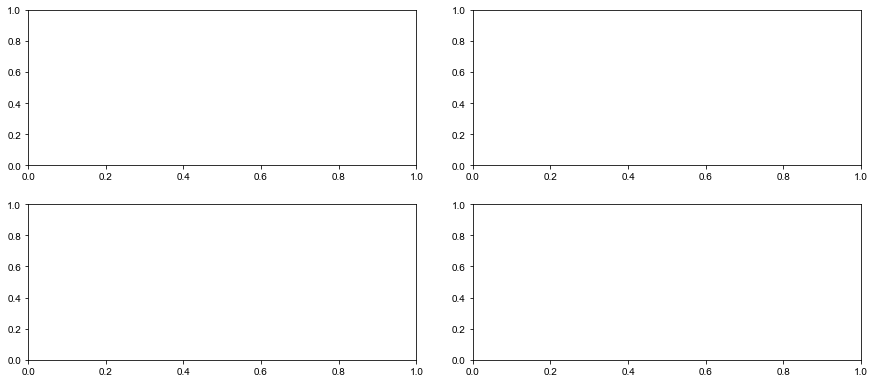